EXERCICE: Choose type of ML, ML regression, ML classification, Unsupervised clustering
I need to choose 2 ML algorithms + Make the models, compare the metrics MAE, MSE, R2, MAPE


0. Import LIBRARIES

In [1]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit



1. DOWNLOAD DATASET

In [2]:


# Obtener la fecha actual
hoy = datetime.datetime.today().strftime('%Y-%m-%d')

# Descargar datos hasta "hoy"
btc = yf.download('BTC-USD', start='2020-01-01', end=hoy)
btc = btc[['Open', 'High', 'Low', 'Close', 'Volume']]
btc.dropna(inplace=True)

btc['Target'] = btc['Close']
btc = btc.iloc[:-1]  # Para evitar mirar el futuro



C:\Users\ihmgs\AppData\Local\Temp\ipykernel_9816\1220763574.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start='2020-01-01', end=hoy)
[*********************100%***********************]  1 of 1 completed


In [3]:
print("Última fecha con datos descargados:", btc.index.max())


Última fecha con datos descargados: 2025-06-18 00:00:00


2. SEPARATE THE DATA AND TRAIN THE REGRESION MODELS

In [4]:
# Definir variables predictoras y objetivo
X = btc[['Open', 'High', 'Low', 'Volume']]
y = btc['Target']

# Dividir en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar los modelos
modelo_lr = LinearRegression()
modelo_rf = RandomForestRegressor()

modelo_lr.fit(X_train, y_train)
modelo_rf.fit(X_train, y_train)


RandomForestRegressor()

3. MAKE PREDICTIONS AND CALCULATE METRICS

In [5]:
# Hacer predicciones
pred_lr = modelo_lr.predict(X_test)
pred_rf = modelo_rf.predict(X_test)

# Función de evaluación
def evaluar(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, r2, mape

# Evaluar ambos modelos
res_lr = evaluar(y_test, pred_lr)
res_rf = evaluar(y_test, pred_rf)

# Mostrar resultados
print("Regresión Lineal -> MAE: %.2f | MSE: %.2f | R²: %.4f | MAPE: %.2f%%" % res_lr)
print("Random Forest     -> MAE: %.2f | MSE: %.2f | R²: %.4f | MAPE: %.2f%%" % res_rf)


Regresión Lineal -> MAE: 617.25 | MSE: 770686.44 | R²: 0.9974 | MAPE: 0.76%
Random Forest     -> MAE: 13154.19 | MSE: 335777112.21 | R²: -0.1400 | MAPE: 13.61%


EVALUAR LOS MODELOS Y GENERAR CONCLUSION 

In [6]:
# Evaluar los modelos
res_lr = evaluar(y_test, pred_lr)
res_rf = evaluar(y_test, pred_rf)

# Desempaquetar las métricas
mae_lr, mse_lr, r2_lr, mape_lr = res_lr
mae_rf, mse_rf, r2_rf, mape_rf = res_rf

# Imprimir métricas
print("\nMÉTRICAS DE LOS MODELOS:")
print(f"Regresión Lineal -> MAE: {mae_lr:.2f} | MSE: {mse_lr:.2f} | R²: {r2_lr:.4f} | MAPE: {mape_lr:.2f}%")
print(f"Random Forest     -> MAE: {mae_rf:.2f} | MSE: {mse_rf:.2f} | R²: {r2_rf:.4f} | MAPE: {mape_rf:.2f}%")

# Generar conclusión
print("\nCONCLUSIÓN AUTOMÁTICA:")
if r2_lr > r2_rf and mae_lr < mae_rf and mape_lr < mape_rf:
    print("El modelo de Regresión Lineal tuvo un mejor rendimiento general en la predicción del precio de Bitcoin,")
    print("mostrando mayor precisión y menor error que el modelo Random Forest.")
elif r2_rf > r2_lr and mae_rf < mae_lr and mape_rf < mape_lr:
    print("El modelo Random Forest mostró un mejor rendimiento general frente a la Regresión Lineal,")
    print("siendo más preciso al predecir el precio de Bitcoin.")
else:
    print("Ambos modelos ofrecen resultados distintos y podrían combinarse o ajustarse con más variables")
    print("para mejorar la precisión de las predicciones.")



MÉTRICAS DE LOS MODELOS:
Regresión Lineal -> MAE: 617.25 | MSE: 770686.44 | R²: 0.9974 | MAPE: 0.76%
Random Forest     -> MAE: 13154.19 | MSE: 335777112.21 | R²: -0.1400 | MAPE: 13.61%

CONCLUSIÓN AUTOMÁTICA:
El modelo de Regresión Lineal tuvo un mejor rendimiento general en la predicción del precio de Bitcoin,
mostrando mayor precisión y menor error que el modelo Random Forest.


Regresión Lineal predijo el precio de Bitcoin con muchísima precisión:

Error muy bajo (MAE: 617)

Casi perfecto en explicarlo todo (R²: 0.997)

Muy poco porcentaje de fallo (MAPE: 0.76%)

Random Forest falló bastante:

Error enorme (MAE: 13.000+)

R² negativo: significa que no entendió la relación entre los datos

Error porcentual alto (MAPE: 13%+)

BITCOIN HISTORICAL PRICE

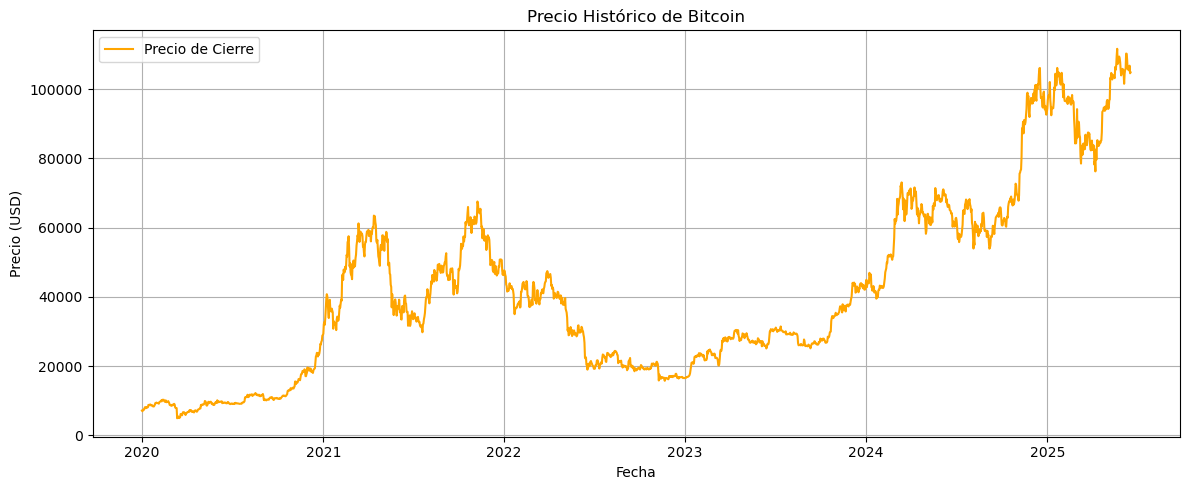

In [7]:
#Precio Historico de BTC 01-01-2020 a 19-06-2025

plt.figure(figsize=(12, 5))
plt.plot(btc.index, btc['Close'], label='Precio de Cierre', color='orange')
plt.title('Precio Histórico de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


PLOT MODELS

LINES 

Negra: valor real del precio de cierre de Bitcoin → nuestra base de comparación.

Violeta punteada: predicción del modelo de Regresión Lineal.

Azul celeste punteada

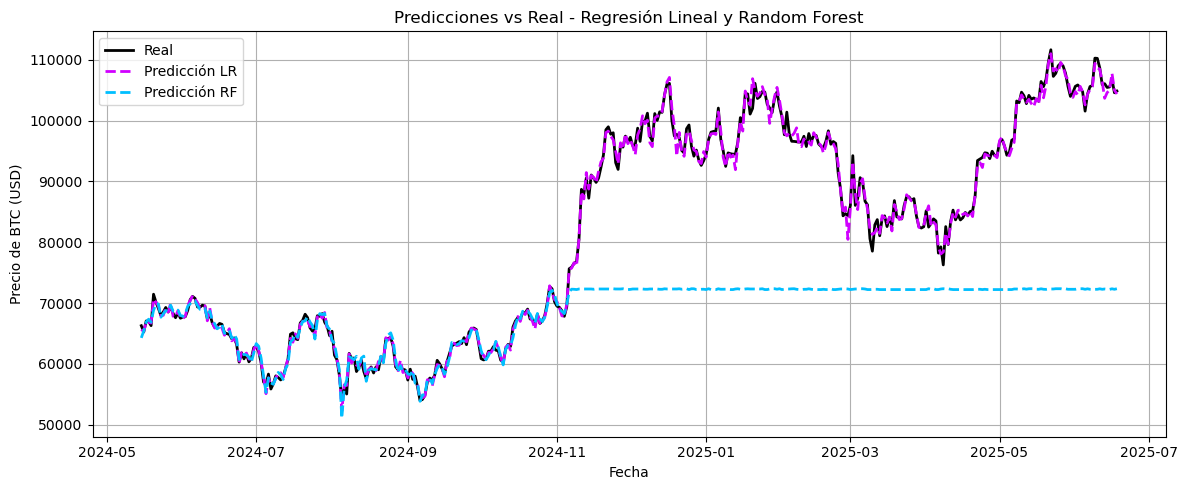

In [8]:
plt.figure(figsize=(12, 5))

# Colores: real en negro, LR en violeta fluorescente, RF en azul eléctrico
plt.plot(y_test.index, y_test.values, label='Real', color='black', linewidth=2)
plt.plot(y_test.index, pred_lr, label='Predicción LR', linestyle='--', color='#D000FF', linewidth=2)  # violeta fluorescente
plt.plot(y_test.index, pred_rf, label='Predicción RF', linestyle='--', color='#00BFFF', linewidth=2)  # azul eléctrico

plt.title('Predicciones vs Real - Regresión Lineal y Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Precio de BTC (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



CROSS VALIDATION

In [9]:
# Crear el objeto TimeSeriesSplit con 5 particiones
tscv = TimeSeriesSplit(n_splits=5)

# Función para evaluar un modelo usando validación cruzada temporal
def cross_validate_model(model, X, y):
    mae_scores, mse_scores, r2_scores, mape_scores = [], [], [], []

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        mae_scores.append(mean_absolute_error(y_test, preds))
        mse_scores.append(mean_squared_error(y_test, preds))
        r2_scores.append(r2_score(y_test, preds))
        mape_scores.append(np.mean(np.abs((y_test - preds) / y_test)) * 100)

    # Mostrar promedios finales
    print("\nVALIDACIÓN CRUZADA TEMPORAL:")
    print("Promedio MAE: %.2f" % np.mean(mae_scores))
    print("Promedio MSE: %.2f" % np.mean(mse_scores))
    print("Promedio R²: %.4f" % np.mean(r2_scores))
    print("Promedio MAPE: %.2f%%" % np.mean(mape_scores))


In [10]:
cross_validate_model(modelo_lr, X, y)



VALIDACIÓN CRUZADA TEMPORAL:
Promedio MAE: 438.24
Promedio MSE: 437953.71
Promedio R²: 0.9973
Promedio MAPE: 0.94%


In [11]:
cross_validate_model(modelo_rf, X, y)



VALIDACIÓN CRUZADA TEMPORAL:
Promedio MAE: 8465.56
Promedio MSE: 229632669.83
Promedio R²: -0.4223
Promedio MAPE: 14.79%


Con la Regresión Lineal, podemos predecir aproximadamente cuánto costará el Bitcoin con base en datos anteriores como apertura, volumen, etc. Si el modelo predice que el precio va a subir, podrías anticiparte y comprar. Si predice que bajará, podrías vender o esperar.

In [12]:
# Tomar los datos de hoy con nombres correctos
hoy = btc.iloc[[-1]][[
    ('Open', 'BTC-USD'),
    ('High', 'BTC-USD'),
    ('Low', 'BTC-USD'),
    ('Volume', 'BTC-USD')
]]

# Predecir el precio de mañana
prediccion_manhana = modelo_lr.predict(hoy)[0]

# Precio de cierre de hoy
precio_hoy = btc.iloc[-1][('Close', 'BTC-USD')]

# Interpretar la predicción
if prediccion_manhana > precio_hoy:
    print(f"➡️ El modelo predice que el precio SUBIRÁ mañana: {prediccion_manhana:.2f} USD")
else:
    print(f"⬅️ El modelo predice que el precio BAJARÁ mañana: {prediccion_manhana:.2f} USD")


⬅️ El modelo predice que el precio BAJARÁ mañana: 104379.62 USD


In [13]:
print("Última fecha disponible:", btc.index.max())


Última fecha disponible: 2025-06-18 00:00:00
